## Restart session & run all to clear variables

Import necessary files

In [1]:
!pip install neuron
from neuron import h, gui
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 19.7 MB/s eta 0:00:00


Functions that create a symmetric branched dendrite with constant length following Rall's Law. Number of offshoots per branch is determined by branch_num, and depth of branch iteration is branch_iter

In [2]:
dends = []

# CHANGE SOMA PROPERTIES HERE --------#
soma = h.Section(name = 'soma_0')
soma.pt3dadd(0, 0, 0, 20)
soma.pt3dadd(20, 0, 0, 20)
soma.nseg=11
soma.Ra = 33.5
soma.cm = 0.95
soma.insert('pas')
soma.g_pas = 0.001
soma.e_pas = -65
#-------------------------------------#

dends.append(soma)

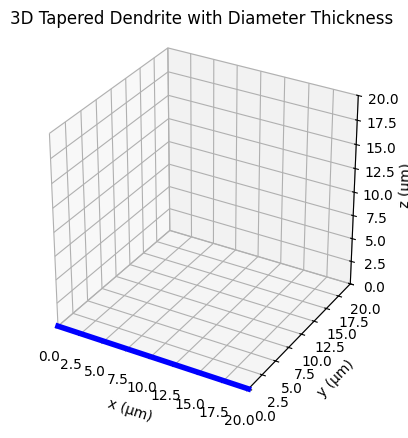

In [3]:
#Function that displays morphology given a complete list of sections that use pt3dadd()
def shape(dends):
  graph_min, graph_max = 0, 0
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for sec in dends:
    sec.push()
    x, y, z = [], [], []
    if sec.name() == 'soma_0':
      thickness=4
    else:
      thickness=2
    npts = int(h.n3d())
    for i in range(npts):
      x.append(h.x3d(i))
      y.append(h.y3d(i))
      z.append(h.z3d(i))
      #find the ends of the coords to scale graph
      all_coords = np.array([x + y + z])
      min = np.min(all_coords)
      max = np.max(all_coords)
      if min < graph_min:
        graph_min = min
      if max > graph_max:
        graph_max = max
    for i in range(npts - 1):
      ax.plot3D(
        [x[i], x[i+1]],
        [y[i], y[i+1]],
        [z[i], z[i+1]],
        linewidth=thickness,
        color='blue')
    h.pop_section()
  ax.set_title("3D Tapered Dendrite with Diameter Thickness")
  ax.set_xlim(graph_min, graph_max)
  ax.set_ylim(graph_min, graph_max)
  ax.set_zlim(graph_min, graph_max)
  ax.set_box_aspect([1, 1, 1])  # Ensures 1:1:1 aspect ratio
  ax.set_xlabel("x (μm)")
  ax.set_ylabel("y (μm)")
  ax.set_zlabel("z (μm)")
  plt.show()

#DISPLAYS NEWLY CREATED SOMA
shape(dends)

In [4]:
class Dendrite:
  def __init__(self, L: float, start_diam: float, end_diam: float, loc: float):
    self.L = L
    self.start_diam = start_diam
    self.end_diam = end_diam
    self.loc = loc

def gen_dend(dends, parent, Dendrite, angle):
  dend = h.Section(name= 'dend_' + str(len(dends)))

  #The following lines give:
    # Linearly tapering diameter values
    # Positioning of the dendrites in such a way that they never cross each other, creating a clear shape() plot
  x_loc = parent.L * Dendrite.loc
  dend.pt3dadd(x_loc, 0, 0, Dendrite.start_diam)
  dend.pt3dadd(x_loc + np.cos(np.radians(angle)) * Dendrite.L, np.sin(np.radians(angle)) * Dendrite.L, 0, Dendrite.end_diam)

  # CHANGE UNIVERSAL DENDRITE PROPERTIES HERE --------#
  dend.nseg=11
  dend.Ra = 33.5
  dend.cm = 0.95
  dend.insert('pas')
  dend.g_pas = 0.001
  dend.e_pas = -65
  #---------------------------------------------------#

  dend.connect(parent)
  dends.append(dend)

def gen_dendrites(dends, parent, Dendrites_List):
  list_len = len(Dendrites_List)
  if list_len < 1:
    return
  dend_angle = 160
  angle_iter = 140 / (list_len - 1)
  alldends = Dendrites_List.copy()
  while len(alldends) > 0:
    min_loc = 0
    for i in range (1, len(alldends)):
      if alldends[i].loc < alldends[min_loc].loc:
        min_loc = i
    gen_dend(dends, parent, alldends[min_loc], dend_angle)
    alldends.pop(min_loc)
    dend_angle = (abs(dend_angle) - angle_iter) * -1 * (dend_angle/abs(dend_angle))

In [5]:
Dendrites_List = [

# CREATE ANY DESIRED DENDRITES BY ADDING/DELETING THE ELEMENTS BELOW IN THE FOLLOWING FORMAT:
# Dendrite(section_length, proximal_diameter, distal_diameter, location on soma (from 0-1))
Dendrite(100, 4, 3, 0.2),
Dendrite(60, 3, 2, 0.7),
Dendrite(50, 4, 3, 1),
Dendrite(40, 4, 2, 0)
#-----------------------------#

]

gen_dendrites(dends, dends[0], Dendrites_List)


|-----------|       soma_0(0-1)
             `----------|       dend_1(0-1)
             `----------|       dend_2(0-1)
             `----------|       dend_3(0-1)
             `----------|       dend_4(0-1)



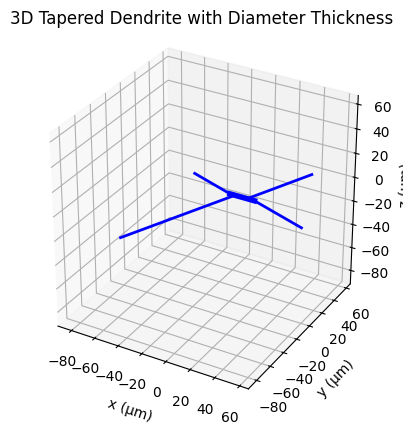

In [6]:
h.topology()
# VISUAL OF SOMA & CONNECTED DENDRITES
shape(dends)